***

### K-Means Clustering and Coordinate Descent

**1. K-means Overview**

- K-means is an unsupervised learning algorithm for partitioning data into $k$ clusters based on feature similarity.
- It minimizes the *within-cluster sum of squares* aka the Distortion function:
  $$
  J = \sum_{i=1}^{n} \sum_{j=1}^{k} r_{ij} \|x_i - \mu_j\|^2
  $$
  where $r_{ij}$ indicates assignment of point $x_i$ to centroid $\mu_j$.

**2. Algorithm Steps**

- **Initialization:** Choose $k$ initial centroids (often randomly).
- **Repeat Until Convergence:**
  - **Assignment step:** Assign each data point to its nearest centroid.
  - **Update step:** Recompute each centroid as the mean of assigned points.

**3. Role of Coordinate Descent**

- K-means alternates between two sets of variables: assignments ($r_{ij}$) and centroids ($\mu_j$).
- Each step optimizes $J$ with respect to one variable group, holding the other fixed.
    - Assignment step: Optimize $r_{ij}$ for fixed $\mu_j$
    - Update step: Optimize $\mu_j$ for fixed $r_{ij}$
- This is the essence of **coordinate descent**:
    - K-means decreases (or keeps unchanged) the objective in each step.
    - Guarantees convergence to a (possibly local) minimum.

**4. Properties and Notes**

- Converges after a finite number of steps (but may reach a local minimum, not global).
- Sensitive to centroid initialization—techniques like k-means++ can help.
- Hard assignments: Each point belongs to one cluster.
- Has extensions: k-medoids, kernel k-means, etc.

**5. Key Takeaway**

- K-means is best understood as a coordinate descent procedure on its cost function, alternately optimizing cluster assignments and centroids.

***

Reference: https://cs229.stanford.edu/lectures-spring2022/main_notes.pdf

In [15]:
import numpy as np
import matplotlib.pyplot as plt

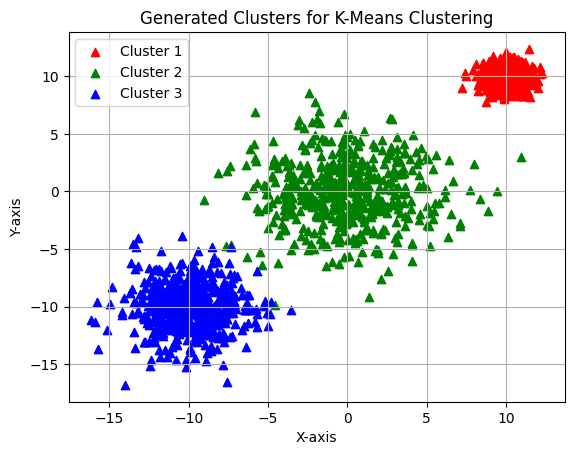

In [16]:
# generate same data for kmeans clustering
x = np.random.randn(500, 2) * .8 + np.array([10, 10])
y = np.random.randn(500, 2) * 3 + np.array([0, 0])
z = np.random.randn(500, 2) * 2 + np.array([-10, -10])

# Plot the three clusters
plt.scatter(x[:, 0], x[:, 1], color='r', marker='^', label='Cluster 1')
plt.scatter(y[:, 0], y[:, 1], color='g', marker='^', label='Cluster 2')
plt.scatter(z[:, 0], z[:, 1], color='b', marker='^', label='Cluster 3')
plt.title('Generated Clusters for K-Means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def kmeans(X, K, max_iters=200):
    # Randomly initialize the centroids
    rng = np.random.default_rng()
    centroids = rng.choice(X, K, replace=False) # Shape (k, d)

    for _ in range(max_iters):
        # Calculate distances between each point and centroid
        diff = X[:, np.newaxis, :] - centroids[np.newaxis, :, :]  # (N, k, d)
        distances = np.einsum("nkd, nkd -> nk", diff, diff) # compute distances for each k  Shape: (N, k)

        # assign labels for each point
        labels = np.argmin(distances, axis=1) # contract k axis

        # Recalcalculate new centroids for each point
        new_centroids = np.empty(centroids.shape)
        for k in range(K):
            points_k = X[labels==k] # (N_k, d)
            new_centroids[k] = points_k.mean(axis = 0) # contract axis N_k to get (d,) -> gets broadcasted to (1, d)
        
        centroids = new_centroids

    return centroids, labels

In [18]:
# Implement k-means from scratch
train_data = np.vstack((x, y, z))
k = 3

max_iters = 100

centroids, labels = kmeans(train_data, k, max_iters)

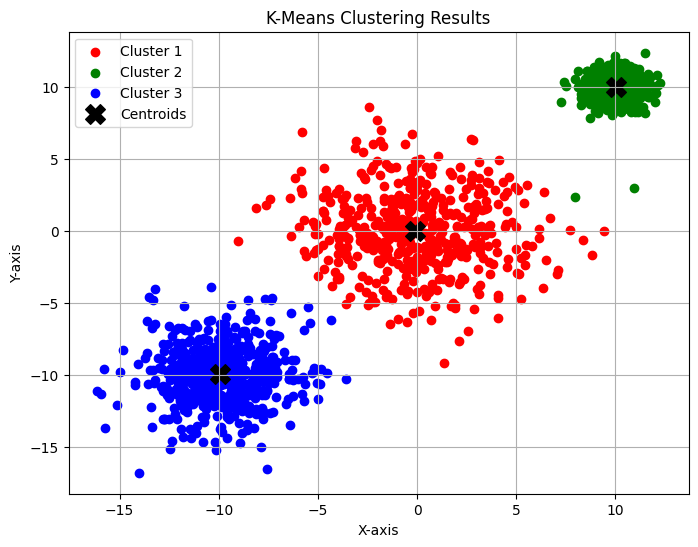

In [19]:
# Plot the output from K-means
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for k in range(k):
    cluster_data = train_data[labels == k]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[k], label=f'Cluster {k+1}')  
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()